In [ ]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Общие функции
```
# def f_input_1():
  '''
  Функция-метод для ввода данных для метода градиентного спуска с постоянным шагом
  Выходные данные: список введенных значений, list
  '''
```
```
# def f_input_2():
  '''
  Функция-метод для ввода данных для метода градиентного спуска с дроблением шага
  Выходные данные: список введенных значений, list
  '''
```
```
# def f_input_3():
  '''
  Функция-метод для ввода данных для метода наискорейшего спуска и метода Ньютона
  Выходные данные: список введенных значений, list
  '''
```
```
# def graph(y,x_solve):
  '''
  Функция-метод для построения графика одномерной функции с указанием точки минимума
  Входные данные:
  y - функция в аналитическом виде, str
  x_solve - найденный минимум, float
  Выходные данные: печать графика с функцией и точкой минимума
  '''
```
```
# def grad(y):
  '''
  Функция-метод для нахождения градиента функции в аналитическом виде
  Входные данные:
  y - функция в аналитическом виде, str
  Выходные данные: градиент функции в аналитическом виде, str
  '''
```

In [ ]:
def f_input_1():
  '''
  Функция для ввода данных
  '''
  y=input('Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:')
  Lambda=input('Введите константа шаг Lambda. Пример: 0.1. Ввод:')
  h=input('Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:')
  if int(h)==1:
    eps=input('Введите точность оптимизации по аргументу для критерия Останова. Пример: 0.0001. Ввод:')
    step_max=input('Введите максимальное число итераций. Пример: 500. Ввод:')
    options=input('Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:')
    dataset=input('Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:')
    return [y,Lambda,eps,step_max,options,dataset]
  else:
    return [y,Lambda]

In [ ]:
def f_input_2():
  '''
  Функция для ввода данных
  '''
  y=input('Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:')
  Lambda0=input('Введите начальный шаг Lambda0. Пример: 0.1. Ввод:')
  e=input('Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:')
  delta=input('Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:')
  h=input('Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:')
  if int(h)==1:
    eps=input('Введите точность оптимизации по аргументу для критерия Останова. Пример: 0.0001. Ввод:')
    step_max=input('Введите максимальное число итераций. Пример: 500. Ввод:')
    options=input('Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:')
    dataset=input('Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:')
    return [y,Lambda0,e,delta,eps,step_max,options,dataset]
  else:
    return [y,Lambda0,e,delta]

In [ ]:
def f_input_3():
  '''
  Функция для ввода данных
  '''
  y=input('Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:')
  h=input('Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:')
  if int(h)==1:
    eps=input('Введите точность оптимизации по аргументу для критерия Останова. Пример: 0.0001. Ввод:')
    step_max=input('Введите максимальное число итераций. Пример: 500. Ввод:')
    options=input('Хотите видеть промежуточные результаты на каждой итерации? False/True. Ввод:')
    dataset=input('Записывать промежуточные результаты на каждой итерации в pandas dataframe? False/True. Ввод:')
    return [y,eps,step_max,options,dataset]
  else:
    return [y]

In [ ]:
def grad(y):
  y=parsing.sympy_parser.parse_expr(y)
  x=y.free_symbols
  gradient=[]
  for x_ in x:
      gradient.append(y.diff(x_))
  return gradient

In [ ]:
def graph(y,x_solve):
  x_solve=float(x_solve)
  x_range=np.linspace(x_solve-0.3,x_solve+1,100)
  y1=parsing.sympy_parser.parse_expr(y)
  for x_ in y1.free_symbols:
    x=x_
  y_range=[y1.subs(x,x_range[i]) for i in range(len(x_range))]
  y_min=y1.subs(x,x_solve)
  plt.figure(figsize=(10, 7))
  plt.plot(x_range, y_range,color='b')
  s='График функции '+str(y)
  plt.title(s)
  plt.scatter(x_solve,y_min,color='g',label='Точка минимума',s=100)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  plt.grid()
  plt.legend()
  plt.show()

# Градиентный спуск с постоянным шагом
```
# def grad_with_constant_step(y,Lambda,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция-метод для нахождения минимума методом градиентного спуска с постоянным шагом
  Входные данные:
  y - функция в аналитическом виде, str
  Lambda - константа шаг, float
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума, шлаг о работе алгоритма и dataset, если был указан соответсвующий параметр, set
  '''
# def all_f_grad_with_constant_step():
  '''
  Функция-метод для объединения ввода и нахождения минимума для метода градиентного спуска с постоянным шагом
  '''
```

In [ ]:
def grad_with_constant_step(y,Lambda,eps=0.00001,step_max=500,options='False',dataset='False'):
  grad_y=grad(y)
  g=0
  y=parsing.sympy_parser.parse_expr(y)
  x=list(y.free_symbols)
  eps=float(eps)
  step_max=int(step_max)
  Lambda=float(Lambda)
  if dataset=='True':
    data=pd.DataFrame([[0,'-','-']],columns=['Номер итерации','x_solve','y'])
  step=1
  x_k_old=np.array([2]*len(x),dtype=float)
  x_k_new=np.array([1]*len(x),dtype=float)
  while step<step_max and np.linalg.norm(x_k_old-x_k_new)>eps:
    s=[]
    for i in range(len(x)):
      x_k_old[i]=x_k_new[i]
      s.append(float(x_k_new[i]-Lambda*grad_y[i].subs(dict(zip(x,x_k_new)))))
    x_k_new=np.array(s)
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',x_k_new,'y =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x_k_new,f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}']],columns=['Номер итерации','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
    step+=1
  if np.linalg.norm(x_k_old-x_k_new)<1:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Полученный минимум функции методом градиентного спуска с постоянным шагом: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  else:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    g+=1
    print('Метод расходится. Необходимо выбрать другой шаг lambda.')
    print('Полученный минимум функции методом градиентного спуска с постоянным шагом: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  if dataset=='True':
    return x_k_new,g,data
  else:
    return x_k_new,g

In [ ]:
def all_f_grad_with_constant_step():
  a=f_input_1()
  s=grad_with_constant_step(*a)

# Примеры функций для тестирования метода градиентного спуска с постоянным шагом

In [ ]:
all_f_grad_with_constant_step()#функция Била

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.008
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '2.87139', y: '0.46603'} f(x,y...) = 0.00307


In [ ]:
all_f_grad_with_constant_step()#пример функции и шага, когда метод не сходится

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:10*x1**2+x2**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Метод расходится. Необходимо выбрать другой шаг lambda.
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x1: '-1.00000', x2: '0.00000'} f(x,y...) = 10.00000


In [ ]:
all_f_grad_with_constant_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x**3+2*y**2-3*x-4*y
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.001
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '1.00000', y: '1.00000'} f(x,y...) = -4.00000


In [ ]:
all_f_grad_with_constant_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x1**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x1: '0.00048'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_constant_step()#функция Бута

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x+2*y-7)**2+(2*x+y-5)**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '1.00034', y: '2.99966'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_constant_step()#функция химмельблау

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x**2+y-11)**2+(x+y**2-7)**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '2.99999', y: '2.00002'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_constant_step()# функция трехгоробого верблюда

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-1.05*x**4+x**6/6+x*y+y**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '-0.00024', y: '0.00057'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_constant_step()#функция маккормика

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:sin(x+y)+(x-y)**2-1.5*x+2.5*y+1
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '-0.54439', y: '-1.54439'} f(x,y...) = -1.91321


In [ ]:
all_f_grad_with_constant_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-x*y+2*x*z-y+y**3+z**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '0.32061', y: '0.66282', z: '-0.31411'} f(x,y...) = -0.48130


# Примеры минимизации одномерных функцией методом град.спуска с постоянным шагом+ визуализация

## *Дополнительные* *функции*

In [ ]:
def all_f_grad_with_constant_step_for_1():
  a=f_input_1()
  s=grad_with_constant_step(*a)
  if s[1]==0:
    graph(a[0],s[0][0])

## *Нахождение* *минимума* *и* *построение* *графика*

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '2.12418'} f(x,y...) = 0.35098


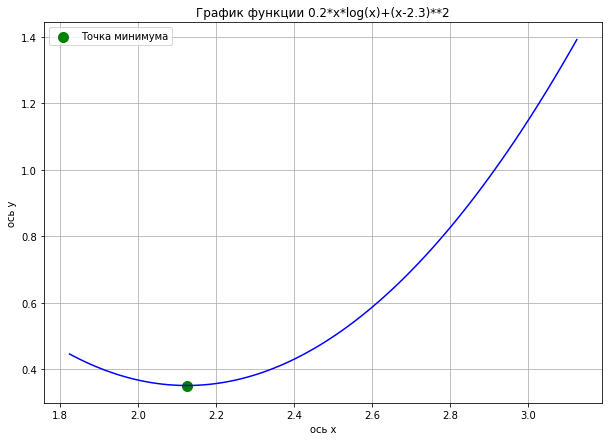

In [ ]:
all_f_grad_with_constant_step_for_1()

In [ ]:
all_f_grad_with_constant_step_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Метод расходится. Необходимо выбрать другой шаг lambda.
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: 'nan'} f(x,y...) = nan


Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '0.24082'} f(x,y...) = 5.14834


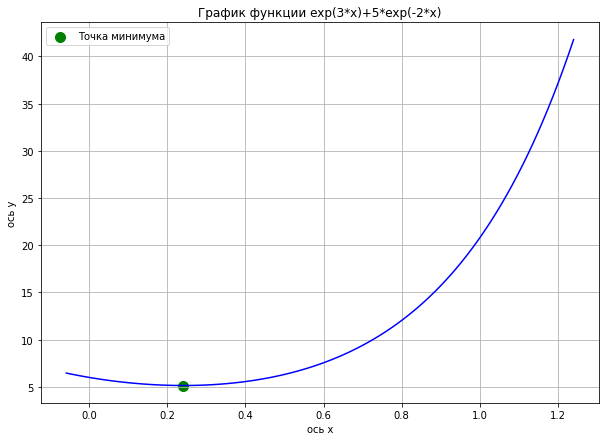

In [ ]:
all_f_grad_with_constant_step_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:3*x-log(x)
Введите константа шаг Lambda. Пример: 0.1. Ввод:0.01
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '0.33343'} f(x,y...) = 2.09861


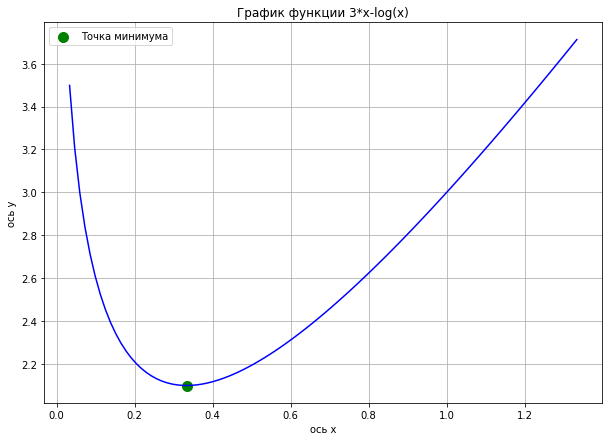

In [ ]:
all_f_grad_with_constant_step_for_1()

# Градиентный спуск с дроблением шага
```
# def grad_with_crush_step(y,Lambda0,e,delta,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
 Функция-метод для нахождения минимума методом градиентного спуска с дроблением шага
  Входные данные:
  y - функция в аналитическом виде, str
  Lambda0 - начальный шаг, float
  e - значение параметра оценки в пределах от 0 до 1, float
  delta - значение параметра дробления в пределах от 0 до 1, float
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума, шлаг о работе алгоритма и dataset, если был указан соответсвующий параметр, set
  '''
# def all_f_grad_with_crush_step():
  '''
  Функция-метод для объединения ввода и нахождения минимума для метода градиентного спуска с дроблением шага
  '''
```

In [ ]:
def grad_with_crush_step(y,Lambda0,e,delta,eps=0.00001,step_max=500,options='False',dataset='False'):
  grad_y=grad(y)
  g=0
  y=parsing.sympy_parser.parse_expr(y)
  x=list(y.free_symbols)
  eps=float(eps)
  step_max=int(step_max)
  Lambda0=float(Lambda0)
  e=float(e)
  delta=float(delta)
  if dataset=='True':
    data=pd.DataFrame([[0,'-','-']],columns=['Номер итерации','x_solve','y'])
  step=1
  x_k_old=np.array([2]*len(x),dtype=float)
  x_k_new=np.array([1]*len(x),dtype=float)
  Lambda_k=Lambda0
  while step<step_max and np.linalg.norm(x_k_old-x_k_new)>eps:
    s=[]
    for i in range(len(x)):
      x_k_old[i]=x_k_new[i]
      s.append(float(x_k_new[i]-Lambda_k*grad_y[i].subs(dict(zip(x,x_k_new)))))
    x_k_new=np.array(s)
    y_x_k_new=float(y.subs(dict(zip(x,x_k_new))))
    y_x_k_old=float(y.subs(dict(zip(x,x_k_old))))
    grad_y_count=[]
    for j in grad_y:
      grad_y_count.append(float(j.subs(dict(zip(x,x_k_old)))))
    grad_y_count=np.array(grad_y_count)
    if y_x_k_new is nan or y_x_k_old is nan:
      step=step_max
      break
    while y_x_k_new - y_x_k_old > -Lambda_k*e*np.linalg.norm(grad_y_count)**2:
      Lambda_k=delta*Lambda_k
      s=[]
      for i in range(len(x)):
        x_k_old[i]=x_k_new[i]
        s.append(float(x_k_new[i]-Lambda_k*grad_y[i].subs(dict(zip(x,x_k_new)))))
      x_k_new=np.array(s)
      y_x_k_new=float(y.subs(dict(zip(x,x_k_new))))
      y_x_k_old=float(y.subs(dict(zip(x,x_k_old))))
      grad_y_count=[]
      for j in grad_y:
        grad_y_count.append(float(j.subs(dict(zip(x,x_k_old)))))
      grad_y_count=np.array(grad_y_count)
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',x_k_new,'y =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x_k_new,f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}']],columns=['Номер итерации','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
    step+=1
  if np.linalg.norm(x_k_old-x_k_new)<1:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Полученный минимум функции методом градиентного спуска с дроблением шага: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  else:
    g+=1
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Метод расходится. Необходимо выбрать другой шаг lambda0, парметр оценки e или параметр дробления delta.')
    print('Полученный минимум функции методом градиентного спуска с дроблением шага: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  if dataset=='True':
    return x_k_new,g,data
  else:
    return x_k_new,g

In [ ]:
def all_f_grad_with_crush_step():
  a=f_input_2()
  s=grad_with_crush_step(*a)

# Примеры функций для тестирования метода градиентного спуска с дроблением шага

In [ ]:
all_f_grad_with_crush_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:10*x1**2+x2**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.95
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x1: '-0.00000', x2: '0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_crush_step()#функция Била

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '2.90220', y: '0.47452'} f(x,y...) = 0.00171


In [ ]:
all_f_grad_with_crush_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x**3+2*y**2-3*x-4*y
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '1.00000', y: '1.00000'} f(x,y...) = -4.00000


In [ ]:
all_f_grad_with_crush_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x1**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.3
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x1: '-0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_crush_step()#функция Бута

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x+2*y-7)**2+(2*x+y-5)**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '1.00001', y: '3.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_crush_step()#функция химмельблау, метод расходится при введенных параметрах

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x**2+y-11)**2+(x+y**2-7)**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.5
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Метод расходится. Необходимо выбрать другой шаг lambda0, парметр оценки e или параметр дробления delta.
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: 'nan', y: 'nan'} f(x,y...) = nan


In [ ]:
all_f_grad_with_crush_step()#функция химмельблау

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x**2+y-11)**2+(x+y**2-7)**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.01
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '2.99999', y: '2.00002'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_crush_step()# функция трехгоробого верблюда

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-1.05*x**4+x**6/6+x*y+y**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '0.00001', y: '-0.00002'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_crush_step()#функция маккормика

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:sin(x+y)+(x-y)**2-1.5*x+2.5*y+1
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.4
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.3
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '-0.54720', y: '-1.54720'} f(x,y...) = -1.91322


In [ ]:
all_f_grad_with_crush_step()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-x*y+2*x*z-y+y**3+z**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.6
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.5
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '0.33329', y: '0.66665', z: '-0.33327'} f(x,y...) = -0.48148


# Примеры минимизации одномерных функцией методом град.спуска с дроблением шага+ визуализация

## *Дополнительные* *функции*

In [ ]:
def all_f_grad_with_crush_step_for_1():
  a=f_input_2()
  s=grad_with_crush_step(*a)
  if s[1]==0:
    graph(a[0],s[0][0])

## *Нахождение* *минимума* *и* *построение* *графика*

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.1
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '2.12460'} f(x,y...) = 0.35098


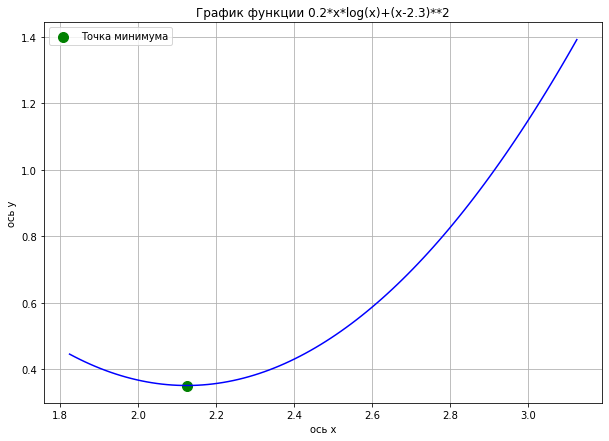

In [ ]:
all_f_grad_with_crush_step_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:exp(3*x)+5*exp(-2*x)
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.01
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.3
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '0.24082'} f(x,y...) = 5.14834


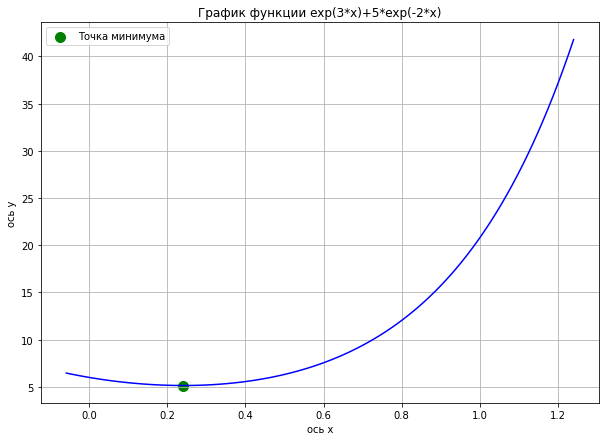

In [ ]:
all_f_grad_with_crush_step_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:3*x-log(x)
Введите начальный шаг Lambda0. Пример: 0.1. Ввод:0.01
Введите значение параметра оценки в пределах от 0 до 1. Пример: 0.1. Ввод:0.2
Введите значение параметра дробления в пределах от 0 до 1. Пример: 0.1. Ввод:0.1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом градиентного спуска с дроблением шага:  {x: '0.33343'} f(x,y...) = 2.09861


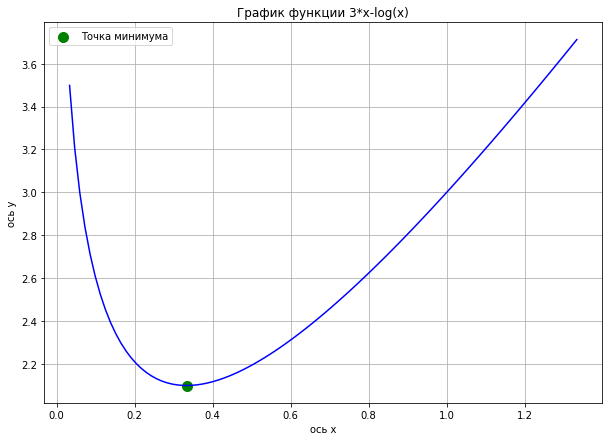

In [ ]:
all_f_grad_with_crush_step_for_1()

# Метод наискорейшего спуска
```
# def grad_fast_descent(y,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция-метод для нахождения минимума методом наискорейшего спуска
  Входные данные:
  y - функция в аналитическом виде, str
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр, set
  '''
# def all_f_with_grad_fast_descent():
  '''
  Функция-метод для объединения ввода и нахождения минимума для метода наискорейшего спуска
  '''
```

In [ ]:
def grad_with_fast_descent(y,eps=0.00001,step_max=500,options='False',dataset='False'):
  grad_y=grad(y)
  y=parsing.sympy_parser.parse_expr(y)
  x=list(y.free_symbols)
  eps=float(eps)
  step_max=int(step_max)
  if dataset=='True':
    data=pd.DataFrame([[0,'-','-']],columns=['Номер итерации','x_solve','y'])
  step=1
  x_k_old=np.array([2]*len(x),dtype=float)
  x_k_new=np.array([1]*len(x),dtype=float)
  Lambda=Symbol('Lambda')
  Lambda_k=0.01
  a=np.linalg.norm(x_k_old-x_k_new)
  while step<step_max and a>eps:
    s=[]
    for i in range(len(x)):
      x_k_old[i]=x_k_new[i]
      s.append(x_k_new[i]-Lambda*grad_y[i].subs(dict(zip(x,x_k_new))))
    s=np.array(s)
    y_x_k_new=simplify(y.subs(dict(zip(x,s))))
    if len(y_x_k_new.free_symbols)!=0:
      Lambda_k=gold_ratio(y_x_k_new,'[0.001,0.49]')
    for i in range(len(x)):
      s[i]=float(s[i].subs(Lambda,Lambda_k))
    x_k_new=np.array(s)
    a=np.linalg.norm(x_k_old-x_k_new)
    step+=1
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',x_k_new,'y =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x_k_new,f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}']],columns=['Номер итерации','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
  if np.linalg.norm(x_k_old-x_k_new)<1:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Полученный минимум функции методом наискорейшего спуска: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  else:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Метод расходится. Невозможно найти оптимальный шаг lambda, поскольку f(lambda)->inf')
    print('Полученный минимум функции  методом наискорейшего спуска: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  if dataset=='True':
    return data,x_k_new
  else:
    return x_k_new

In [ ]:
def gold_ratio(y,g,eps=0.00001,step_max=500):
  step=1
  for x_ in y.free_symbols:
    x=x_
  eps=float(eps)
  step_max=int(step_max)
  a=float(g.split(',')[0].replace('[',''))
  b=float(g.split(',')[1].replace(']',''))
  p=(1+5**(1/2))/2
  while math.fabs(b-a)>eps and step<step_max:
    x1=b-(b-a)/p
    x2=a+(b-a)/p
    if float(y.subs(x,x1)) > float(y.subs(x,x2)):
      a=x1
    else:
      b=x2
    x_solve=float((a+b)/2)
    step+=1
  x_solve=(a+b)/2
  return x_solve

In [ ]:
def all_f_grad_with_fast_descent():
  a=f_input_3()
  s=grad_with_fast_descent(*a)

# Примеры функций для тестирования метода наискорейшего спуска

In [ ]:
all_f_grad_with_fast_descent()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:10*x1**2+x2**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x1: '-0.00000', x2: '0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_fast_descent()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x**3+2*y**2-3*x-4*y
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '1.00000', y: '1.00000'} f(x,y...) = -4.00000


In [ ]:
all_f_grad_with_fast_descent()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x1**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x1: '0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_fast_descent()#функция Бута

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x+2*y-7)**2+(2*x+y-5)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '1.00000', y: '3.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_fast_descent()#функция химмельблау

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x**2+y-11)**2+(x+y**2-7)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '3.00000', y: '2.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_fast_descent()# функция трехгоробого верблюда

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-1.05*x**4+x**6/6+x*y+y**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '0.00000', y: '-0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_with_fast_descent()#функция маккормика

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:sin(x+y)+(x-y)**2-1.5*x+2.5*y+1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '-0.54719', y: '-1.54720'} f(x,y...) = -1.91322


In [ ]:
all_f_grad_with_fast_descent()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-x*y+2*x*z-y+y**3+z**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '0.33332', y: '0.66666', z: '-0.33331'} f(x,y...) = -0.48148


# Примеры минимизации одномерных функцией методом наискорейшего спуска+ визуализация

## *Дополнительные* *функции*

In [ ]:
def all_f_grad_with_fast_descent_for_1():
  a=f_input_3()
  s=grad_with_fast_descent(*a)
  if type(s)==tuple:
    graph(a[0],s[1][0])
  else:
    graph(a[0],s[0])

## *Нахождение* *минимума* *и* *построение* *графика*

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '2.12464'} f(x,y...) = 0.35098


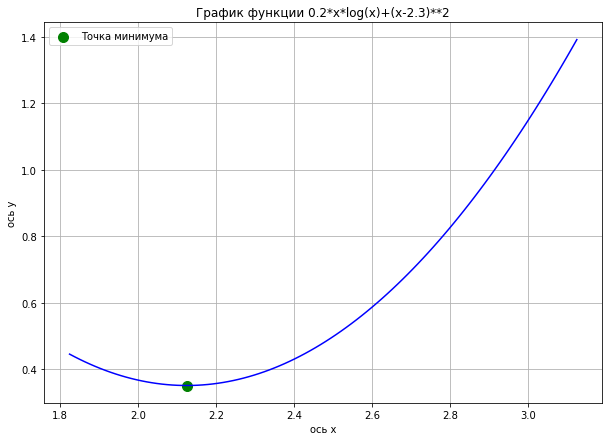

In [ ]:
all_f_grad_with_fast_descent_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:exp(3*x)+5*exp(-2*x)
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '0.24079'} f(x,y...) = 5.14834


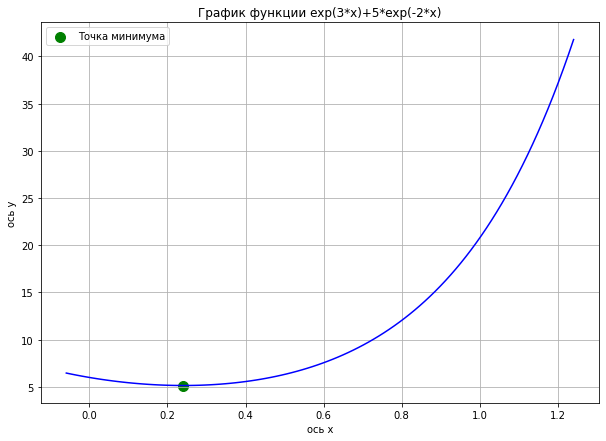

In [ ]:
all_f_grad_with_fast_descent_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:3*x-log(x)
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом наискорейшего спуска:  {x: '0.33333'} f(x,y...) = 2.09861


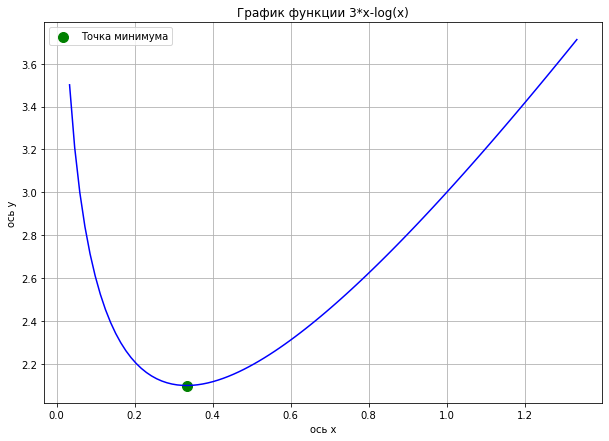

In [ ]:
all_f_grad_with_fast_descent_for_1()

# Алгоритма Ньютона-сопряженного градиента
```
# def grad_of_newton(y,eps=0.00001,step_max=500,options='False',dataset='False'):
  '''
  Функция-метод для нахождения минимума методом Ньютона.
  Входные данные:
  y - функция в аналитическом виде, str
  eps - точность оптимизации, float
  step_max - максимально количество итераций, int
  options - вывод промежуточных результатов, str
  dataset - сохранение промежуточных результатов в dataframe, str
  Выходные данные: печать минимума и значения в точке экстремума. Возвращает точку минимума и dataset, если был указан соответсвующий параметр, set
  '''
# def all_f_grad_of_newton():
  '''
  Функция-метод для объединения ввода и нахождения минимума для метода Ньютона
  '''
```

In [ ]:
def grad_of_newton(y,eps=0.00001,step_max=500,options='False',dataset='False'):
  grad_y=grad(y)
  y=parsing.sympy_parser.parse_expr(y)
  x=list(y.free_symbols)
  eps=float(eps)
  step_max=int(step_max)
  if dataset=='True':
    data=pd.DataFrame([[0,'-','-']],columns=['Номер итерации','x_solve','y'])
  step=0
  x_k_old=np.array([2]*len(x),dtype=float)
  x_k_new=np.array([1]*len(x),dtype=float)
  Lambda=Symbol('Lambda')
  Lambda_k=0.01
  a=np.linalg.norm(x_k_old-x_k_new)
  while step<step_max and a>eps:
    if step==0:
      grad_y_count=[]
      for j in grad_y:
        grad_y_count.append(j.subs(dict(zip(x,x_k_new))))
      P_k_new=np.array(grad_y_count)
    else:
      P_k_old=P_k_new
      grad_y_count1=[]
      grad_y_count2=[]
      for j in grad_y:
        grad_y_count1.append(float(j.subs(dict(zip(x,x_k_new)))))
        grad_y_count2.append(float(j.subs(dict(zip(x,x_k_old)))))
      grad_k1=np.array(grad_y_count1)
      grad_k2=np.array(grad_y_count2)
      betta_k=np.linalg.norm(grad_k1)**2/np.linalg.norm(grad_k2)**2
      for j in range(len(grad_y)):
        P_k_new[j]=grad_y_count1[j]+betta_k*P_k_old[j]
    s=[]
    for i in range(len(x)):
      x_k_old[i]=x_k_new[i]
      s.append(x_k_new[i]-Lambda*P_k_new[i])
    s=np.array(s)
    y_x_k_new=simplify(y.subs(dict(zip(x,s))))
    if len(y_x_k_new.free_symbols)!=0:
      Lambda_k=gold_ratio(y_x_k_new,'[0.001,0.49]')
    for i in range(len(x)):
      s[i]=float(s[i].subs(Lambda,Lambda_k))
    x_k_new=np.array(s)
    a=np.linalg.norm(x_k_old-x_k_new)
    step+=1
    if options=='True':
      print('Промежуточный результат на итерации',step,': x =',x_k_new,'y =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
    if dataset=='True':
      data1=pd.DataFrame([[step,x_k_new,f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}']],columns=['Номер итерации','x_solve','y'])
      data=pd.concat([data,data1],ignore_index=True)
  if np.linalg.norm(x_k_old-x_k_new)<1:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Полученный минимум функции методом Ньютона: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  else:
    x_k_new=list(map(lambda x:f'{float(x):.5f}',x_k_new))
    print('Метод расходится. Невозможно найти оптимальный шаг lambda, поскольку f(lambda)->inf')
    print('Полученный минимум функции  методом Ньютона: ',dict(zip(x,x_k_new)),'f(x,y...) =',f'{float(y.subs(dict(zip(x,x_k_new)))):.5f}')
  if dataset=='True':
    return data,x_k_new
  else:
    return x_k_new

In [ ]:
def all_f_grad_of_newton():
  a=f_input_3()
  s=grad_of_newton(*a)

# Примеры функций для тестирования метода Ньютона

In [ ]:
all_f_grad_of_newton()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:10*x1**2+x2**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x1: '-0.00000', x2: '-0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_of_newton()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x**3+2*y**2-3*x-4*y
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '1.00000', y: '1.00000'} f(x,y...) = -4.00000


In [ ]:
all_f_grad_of_newton()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:x1**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x1: '0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_of_newton()#функция Бута

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x+2*y-7)**2+(2*x+y-5)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '1.00000', y: '3.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_of_newton()#функция химмельблау

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:(x**2+y-11)**2+(x+y**2-7)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '3.00000', y: '2.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_of_newton()# функция трехгоробого верблюда

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-1.05*x**4+x**6/6+x*y+y**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '0.00000', y: '-0.00000'} f(x,y...) = 0.00000


In [ ]:
all_f_grad_of_newton()#функция маккормика

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:sin(x+y)+(x-y)**2-1.5*x+2.5*y+1
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '-3.68879', y: '-4.68879'} f(x,y...) = -5.05482


In [ ]:
all_f_grad_of_newton()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:2*x**2-x*y+2*x*z-y+y**3+z**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '0.33333', y: '0.66667', z: '-0.33332'} f(x,y...) = -0.48148


# Примеры минимизации одномерных функцией методом Ньютона+ визуализация

## *Дополнительные* *функции*

In [ ]:
def all_f_grad_of_newton_for_1():
  a=f_input_3()
  s=grad_of_newton(*a)
  if type(s)==tuple:
    graph(a[0],s[1][0])
  else:
    graph(a[0],s[0])

## *Нахождение* *минимума* *и* *построение* *графика*

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:0.2*x*log(x)+(x-2.3)**2
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '2.12464'} f(x,y...) = 0.35098


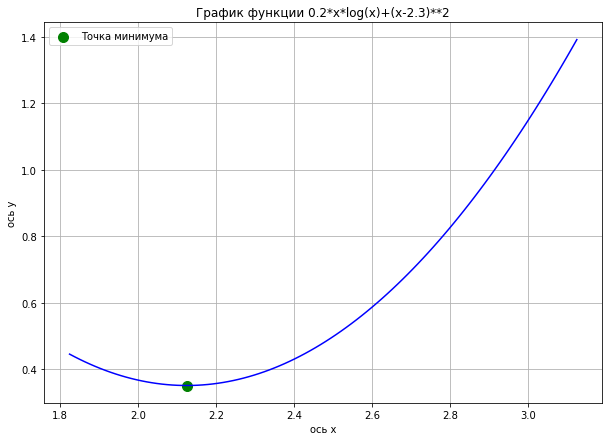

In [ ]:
all_f_grad_of_newton_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:exp(3*x)+5*exp(-2*x)
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '0.24079'} f(x,y...) = 5.14834


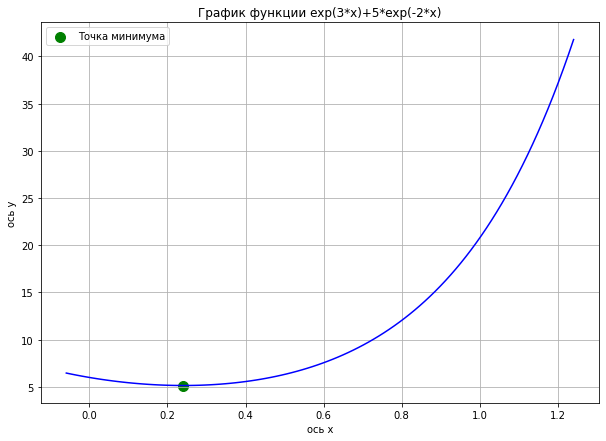

In [ ]:
all_f_grad_of_newton_for_1()

Введите функцию в аналитическом виде f(x,y,..). Пример: x**2+y**2. Ввод:3*x-log(x)
Хотите ввести дополнительные ограничения? Если нет, будут взяты параметры по умолчанию. 1- Да/ 0 - Нет. Ввод:0
Полученный минимум функции методом Ньютона:  {x: '0.33333'} f(x,y...) = 2.09861


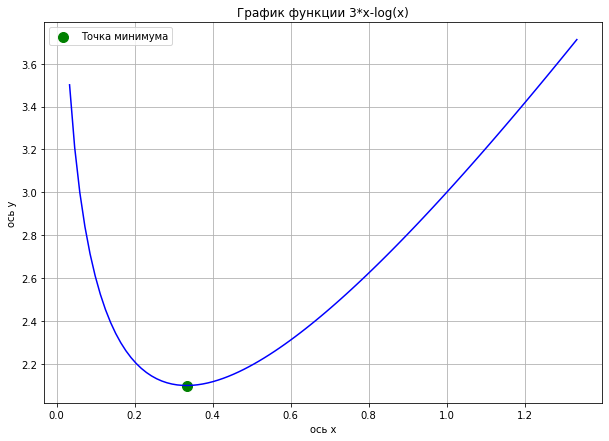

In [ ]:
all_f_grad_of_newton_for_1()

# Визуализация метода градиентного спуска с постоянным шагом на примере функции $y=x^2-xlog(10-x)+4x-10$

In [ ]:
s=grad_with_constant_step('x**2-x*log(10-x)+4*x-10',0.3,dataset='True')

Полученный минимум функции методом градиентного спуска с постоянным шагом:  {x: '-0.77538'} f(x,y...) = -10.65702


In [ ]:
s[2].head()

,Номер итерации,x_solve,y
0,0,-,-
1,1,[-0.17416596013246743],-10.26229
2,2,[-0.5685753212573188],-10.61039
3,3,[-0.7039250250855441],-10.65146
4,4,[-0.7506578817621934],-10.65636


In [ ]:
!pip install celluloid

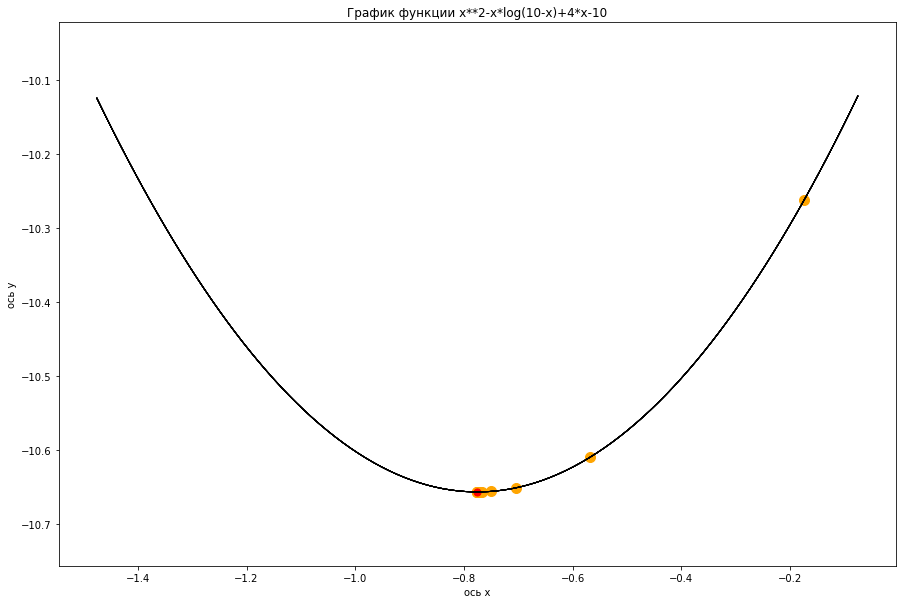

In [ ]:
from celluloid import Camera
from matplotlib.animation import PillowWriter
fig = plt.figure(figsize=(15,10))
camera = Camera(fig)
y='x**2-x*log(10-x)+4*x-10'# НЕОБХОДИМО ВВЕСТИ ФУНКЦИЮ ВРУЧНУЮ!
y1=parsing.sympy_parser.parse_expr(y)
x_solve=float(s[0][0])
x_range=np.linspace(x_solve-0.7,x_solve+0.7,100)# Границы стоит проверить для собственной функции (например, если присутствует логарифм)
data=s[2]
for x_ in y1.free_symbols:
  x=x_
y_range=[float(y1.subs(x,x_range[i])) for i in range(len(x_range))]
y_min=y1.subs(x,x_solve)
for i in range(len(data)-1):
  t = plt.scatter(data['x_solve'][i+1][0],float(data['y'][i+1]),color='orange',s=100,label='orange')
  g = plt.plot(x_range,y_range,linewidth = 1, color='black')
  a = plt.scatter(x_solve,y_min,s=50,color='red',label='Точка минимума')
  s1='График функции '+str(y)
  plt.title(s1)
  plt.xlabel("ось x")
  plt.ylabel("ось y")
  plt.ylim(min(y_range)-0.1,max(y_range)+0.1)
  camera.snap()
plt.show()
animation = camera.animate()
writer = PillowWriter(fps=2)
animation.save('animation.gif', writer=writer)

***Анимация метода***

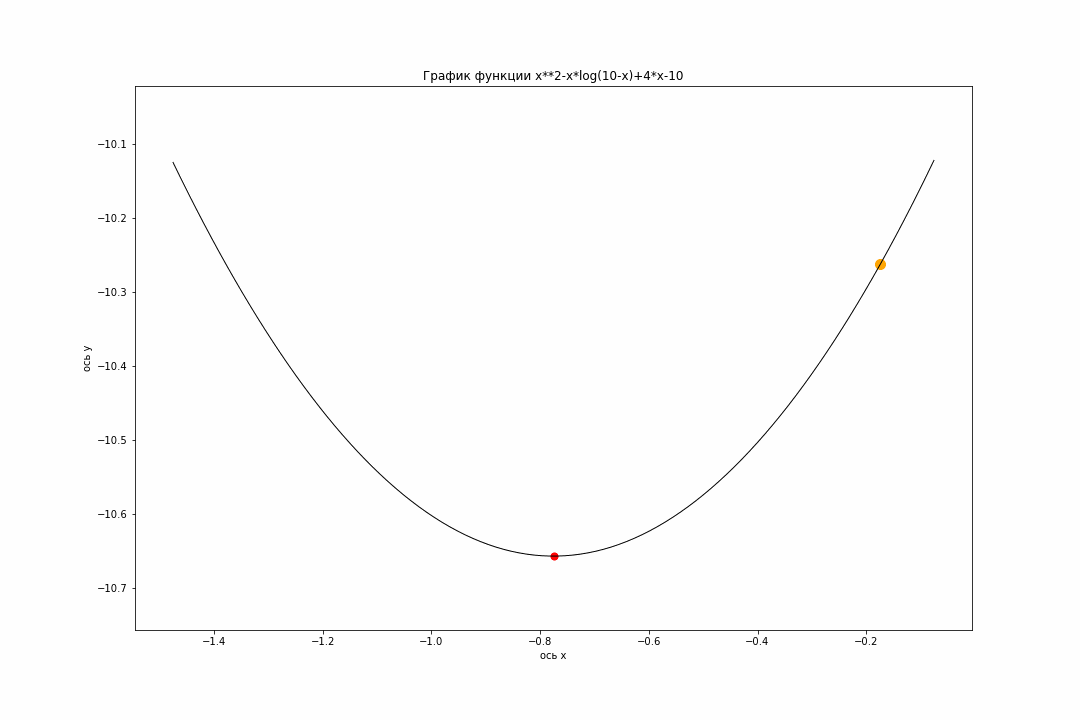